In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.spatial

np.random.seed( 2503865 ) # We'll set the random number generator's seed so everyone generates the exact same dataset

In [32]:
# Let's define 2 clusters defined by Gaussians (we'll call them clumps to avoid confusion later)
sigma = 0.05

clump1_N = 100
clump1_x = [ np.random.normal(loc=0.25,scale=sigma) for i in range(clump1_N) ]
clump1_y = [ np.random.normal(loc=0.75,scale=sigma) for i in range(clump1_N) ]

clump2_N = clump1_N
clump2_x = [ np.random.normal(loc=0.75,scale=sigma) for i in range(clump2_N) ]
clump2_y = [ np.random.normal(loc=0.25,scale=sigma) for i in range(clump2_N) ]

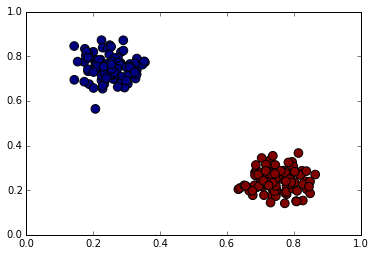

In [33]:
points_x = clump1_x + clump2_x
points_y = clump1_y + clump2_y
clump1_color = 0
clump2_color = 1
clump_area = 75
colors = [ clump1_color for i in range(clump1_N) ] + [ clump2_color for i in range(clump2_N) ]
areas = [ clump_area for i in range(clump1_N+clump2_N) ]

plt.scatter( points_x, points_y, c=colors, s=areas )

In [34]:
clump3_N = 5
clump3_x = [ np.random.normal(loc=0.5,scale=sigma) for i in range(clump3_N) ]
clump3_y = [ np.random.normal(loc=0.5,scale=sigma) for i in range(clump3_N) ]

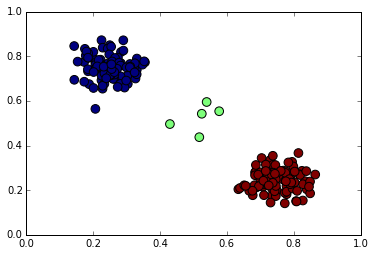

In [35]:
points_x = clump1_x + clump2_x + clump3_x
points_y = clump1_y + clump2_y + clump3_y
clump1_color = 0
clump2_color = 1
clump3_color = 0.5
clump_area = 75
colors = [ clump1_color for i in range(clump1_N) ] + [ clump2_color for i in range(clump2_N) ] + [ clump3_color for i in range(clump3_N) ]
areas = [ clump_area for i in range(clump1_N+clump2_N+clump3_N) ]

plt.scatter( points_x, points_y, c=colors, s=areas )
#plt.savefig('../images/instance_based_learning_001.png')

In [36]:
# KNN algorithm implementation
# Inputs: 
#       points_x, points_y: data set 
#       colors: a list for labels of (x,y) pionts in the data set
#       new_x, new_y: a new point to classify
#       k: KNN parameter
# Output:
#       a label for the new point(new_x,new_y)
from scipy.spatial import distance
from collections import Counter
def exhustive_KNN(points_x, points_y, colors, new_x, new_y, k):
    result = []
    for i in range(len(points_x)):
        a = [points_x[i],points_y[i]]
        b = [new_x,new_y]
        c = colors[i]
        dst = distance.euclidean(a,b)
        # create a list of tupels:(data set instance, label, distance to the new point)
        result.append((a, c, dst))
    # sort the list based on the third elements of tupels(distances)    
    temp = sorted(result, key=lambda tup: tup[2])
    colorTag = []
    # extract the labels of the k minimum distabce of the sorted list
    for j in range(k):
        colorTag.append(temp[j][1])
    # return the majarity of labels
    c = Counter(colorTag)
    value, count = c.most_common()[0]
    return value      

In [37]:
# set k, and call the the fuction on all the new points
# output is a list representing a label for each of the new points 
k = 25
KNN_labels = []
for i in range(clump3_N):
    label = exhustive_KNN(points_x, points_y, colors, clump3_x[i], clump3_y[i], k)
    KNN_labels.append(label)
KNN_labels

[1, 0, 1, 0, 0]